In [1]:
print("filter design")

hello


C:\Users\goot1230\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


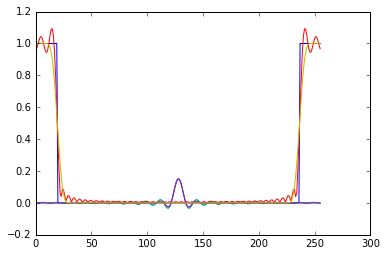

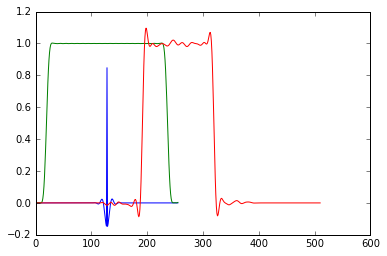

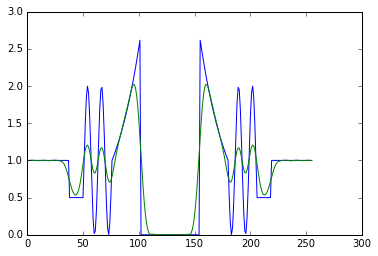

In [6]:
%matplotlib inline
import MyModule as mm
import numpy as np
import random
import matplotlib.pyplot as plt
import math

N=256
M=51

'''moving average filter'''
x=np.zeros ((N))
noise=np.array([random.random() for n in range(N)])
for n in range(N//4,N*3//4):
    x[n]=1.0
x=x+(noise-0.5)/10.0


h=np.zeros((N))
for n in range(M):
    h[n]=1.0/M

# plt.plot(h)
# plt.plot(np.abs(mm.fft(h)))

# h=np.zeros(N)
# h[0]=0.1
# h[1]=0.2
# h[2]=0.4
# h[3]=0.2
# h[4]=0.1
# 
# plt.plot(h)
# plt.plot(np.abs(mm.fft(h)))


'''lp filter'''
LP=np.zeros((N),dtype=complex)
fc=0.08
Nc=int(fc*N)
for n in range(Nc):
    LP[n]=1.0
    LP[(N-n+N) % N]=1.0
    
plt.plot(np.abs(LP))
lp=mm.ifft(LP)
lpr=np.zeros((N),dtype=complex)
lpr[:N//2],lpr[N//2:]=lp[N//2:],lp[:N//2]
plt.plot(lpr.real)
#plt.plot(lp.real)

lp_trimed = np.zeros((N),dtype=complex)          
lp_trimed[N//2-M//2:N//2+M//2]=lpr[N//2-M//2:N//2+M//2]
LP_trimed=mm.fft(lp_trimed)

plt.plot(np.abs(LP_trimed))
plt.plot(lp_trimed.real)

'''lp-windowed  0.54-0.46cos(2pi*n/M)'''
window=np.zeros((N),dtype=complex)
for n in range(M):
    window[N//2-M//2+n]=0.54-0.46*math.cos(2*math.pi*n/M)
lp_windowed=lpr*window
LP_windowed=mm.fft(lp_windowed)

plt.plot(lp_windowed.real)
plt.plot(np.abs(LP_windowed))

'''hp-windowed'''
hp=-1.0*lp_windowed
hp[N//2]+=1.0
plt.figure()
plt.plot(hp.real)
plt.plot(np.abs(mm.fft(hp)))


plt.plot(mm.conv(x,lp_windowed))

'''filter design'''
PP=np.zeros((N),dtype=complex)
Nc1=int(0.15*N)
Nc2=int(0.2*N)
Nc3=int(0.3*N)
Nc4=int(0.4*N)
Nc5=int(0.45*N)
for n in range(Nc1):
    PP[n]=1.0
    PP[(N-n)%N]=1.0
for n in range(Nc1,Nc2):
    PP[n]=0.5
    PP[(N-n)%N]=0.5
for n in range(Nc2,Nc3):
    PP[n]=1.0+math.sin(2*math.pi*(n-Nc2)*2/(Nc3-Nc2))
    PP[(N-n)%N]=1.0+math.sin(2*math.pi*(n-Nc2)*2/(Nc3-Nc2))
for n in range(Nc3,Nc4):
    PP[n]=math.exp((n-Nc3)/(Nc4-Nc3))
    PP[(N-n)%N]=math.exp((n-Nc3)/(Nc4-Nc3))
plt.figure()
plt.plot(PP.real)

lp=mm.ifft(PP)
lpr=np.zeros((N),dtype=complex)
lpr[:N//2],lpr[N//2:]=lp[N//2:],lp[:N//2]


lp_trimed = np.zeros((N),dtype=complex)          
lp_trimed[N//2-M//2:N//2+M//2]=lpr[N//2-M//2:N//2+M//2]
LP_trimed=mm.fft(lp_trimed)  
# plt.plot(np.abs(LP_trimed))
# plt.plot(lp_trimed.real)

#lp-windowed  0.54-0.46cos(2pi*n/M)
window=np.zeros((N),dtype=complex)
for n in range(M):
    window[N//2-M//2+n]=0.54-0.46*math.cos(2*math.pi*n/M)
lp_windowed=lpr*window
LP_windowed=mm.fft(lp_windowed)


# plt.plot(lp_windowed.real)
plt.plot(np.abs(LP_windowed))  

